# **Whats keeping you up at night?**
##***Objective: Predicting Sleep Disorder through Stress Levels and Lifestyle Insights***

The sleep health and lifestyle dataset is a detailed collection of data aimed at understanding the relationships between sleep quality, health metrics, lifestyle choices and stress level.
It contains 100,000 records and 15 variables, providing a comprehensive view of participants daily habits and wellbeing.



## **Dataset Overview**

- Person ID : Individual identification number. A unique identifier for each person.

- Gender : Gender information. Categorized as Male or Female.

- Age : Age information. The person's age is indicated.

- Occupation : Occupation information. The type of job or profession the person holds.

- Sleep Duration : Sleep duration. The total amount of time a person sleeps during the night (usually in hours).

- Quality of Sleep : Sleep quality. Indicates how efficient and restful a person's sleep process is.

- Physical Activity Level : Physical activity level. Indicates the amount of physical activity a person does daily (for example, low, moderate, high).

- Stress Level : Stress level. An indicator of how stressed a person is in their daily lives.

- BMI Category : Body mass index (BMI) category. A health indicator that divides a person into categories such as overweight, normal, and obese.

- Blood Pressure: Blood pressure value (e.g., 140/90)

- Heart Rate : Heart rate. The number of times a person's heart beats per minute.

- Daily Steps : Daily step count. Indicates the total number of steps a person takes in a day.

- Sleep Disorder : Sleep disorder. Any problem or discomfort a person experiences with their sleep patterns.

- Systolic BP	: this is the first number. It measures the pressure your blood is pushing against your artery walls when the heart beats.

- Diastolic BP : this is the second number. It measures the pressure your blood is pushing against your artery walls while the heart muscle rests between beats.



## A. Importing Libraries

To gain an initial understanding of the dataset, we begin by importing the necessary libraries.

In [94]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
#import label encoder
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
# Libraries for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go


#Machine Learning Multi-classification Prediction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [95]:
#from google.colab import files
#uploaded = files.upload()


Saving Corrected_BMI_vs_Blood_Pressure_Data.csv to Corrected_BMI_vs_Blood_Pressure_Data (3).csv


## B. Dataset Loading and Initial Exprolation

This point aims to check the dataset’s shape, and generating summary statistics to explore its structure.

In [96]:
# Load dataset
sleep_df = pd.read_csv("02_sleep_health_lifestyle_synthetic.csv")

# Check the shape of the data frame
print(sleep_df.shape)
# Show the head of the data frame
sleep_df.head()

(100000, 15)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,Male,39,Construction Worker,7.4,3,53,7,Obese,146/97,92,5705,NaN,146,97
1,2,Female,27,Sales Representative,6.5,4,32,7,Normal,126/85,84,14442,NaN,126,85
2,3,Female,42,Software Engineer,5.4,7,77,8,Obese,139/97,59,7305,NaN,139,97
3,4,Female,50,Software Engineer,7.9,5,43,10,Normal,128/81,88,10700,Insomnia,128,81
4,5,Female,51,Doctor,8.0,7,38,9,Underweight,115/76,96,9193,NaN,115,76


In [97]:
# Show a basic description about the values stored in all the columns
sleep_df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic BP,Diastolic BP
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,43.951570,6.494987,5.485010,50.021990,5.471430,77.452720,8514.697930,127.436200,83.103260
std,28867.657797,15.285862,1.445128,2.870742,23.366954,2.875098,13.293491,3752.485636,10.634363,7.402732
min,1.000000,18.000000,4.000000,1.000000,10.000000,1.000000,55.000000,2000.000000,110.000000,70.000000
25%,25000.750000,31.000000,5.200000,3.000000,30.000000,3.000000,66.000000,5279.000000,118.000000,77.000000
50%,50000.500000,44.000000,6.500000,5.000000,50.000000,5.000000,77.000000,8522.000000,127.000000,82.000000
75%,75000.250000,57.000000,7.700000,8.000000,70.000000,8.000000,89.000000,11767.000000,136.000000,88.000000
max,100000.000000,70.000000,9.000000,10.000000,90.000000,10.000000,100.000000,15000.000000,150.000000,100.000000


## C. Basic Data Cleaning

Missing Values and Dropping Columns

In [98]:
# Dropping irrelevant columns from sleep dataset
sleep_df = sleep_df.drop(['Occupation', 'Blood Pressure','Person ID'], axis=1)

In [99]:
# Checking if columns are dropped
sleep_df.columns
sleep_df.shape

(100000, 12)

In [100]:
# Check for missing (NaN) values in the entire DataFrame
print(sleep_df.isna().sum())  # Returns the count of NaN values for each column

Gender                         0
Age                            0
Sleep Duration                 0
Quality of Sleep               0
Physical Activity Level        0
Stress Level                   0
BMI Category                   0
Heart Rate                     0
Daily Steps                    0
Sleep Disorder             75004
Systolic BP                    0
Diastolic BP                   0
dtype: int64


In [101]:
# We see that aboout 75 % of the data having no value for "Sleep Disorder".
# One option would be to drop the rows with any NaN values
# sleep_df_updated = sleep_df.dropna()

# However, since this affects a lot of data, we would potentially loose some information,
# so for the moment we replace the NaN values with 'No Sleep Disorder'
sleep_df = sleep_df.fillna('No Sleep Disorder')

In [102]:
# Check for missing (NaN) values in the entire DataFrame
print(sleep_df.isna().sum())

Gender                     0
Age                        0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Systolic BP                0
Diastolic BP               0
dtype: int64


In [103]:
# Check for data types
print("\nSleep Dataset Info:")
print(sleep_df.info())
sleep_df.shape


Sleep Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gender                   100000 non-null  object 
 1   Age                      100000 non-null  int64  
 2   Sleep Duration           100000 non-null  float64
 3   Quality of Sleep         100000 non-null  int64  
 4   Physical Activity Level  100000 non-null  int64  
 5   Stress Level             100000 non-null  int64  
 6   BMI Category             100000 non-null  object 
 7   Heart Rate               100000 non-null  int64  
 8   Daily Steps              100000 non-null  int64  
 9   Sleep Disorder           100000 non-null  object 
 10  Systolic BP              100000 non-null  int64  
 11  Diastolic BP             100000 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 9.2+ MB
None


(100000, 12)

In [104]:
# Check for distinct values in the str data columns
print(sleep_df['Gender'].unique())
print(sleep_df['BMI Category'].unique())
print(sleep_df['Sleep Disorder'].unique())

['Male' 'Female']
['Obese' 'Normal' 'Underweight' 'Overweight']
['No Sleep Disorder' 'Insomnia']


## D. Basic Data Visualization and further Data Exploration

**Distribution of variables**

In this phase, we will conduct a comprehensive analysis of each variable to understand the distribution of values and identify any underlying patterns within the dataset. This step enables us to gain insights into the data structure and detect potential anomalies ensuring a well-informed approach for further analysis.

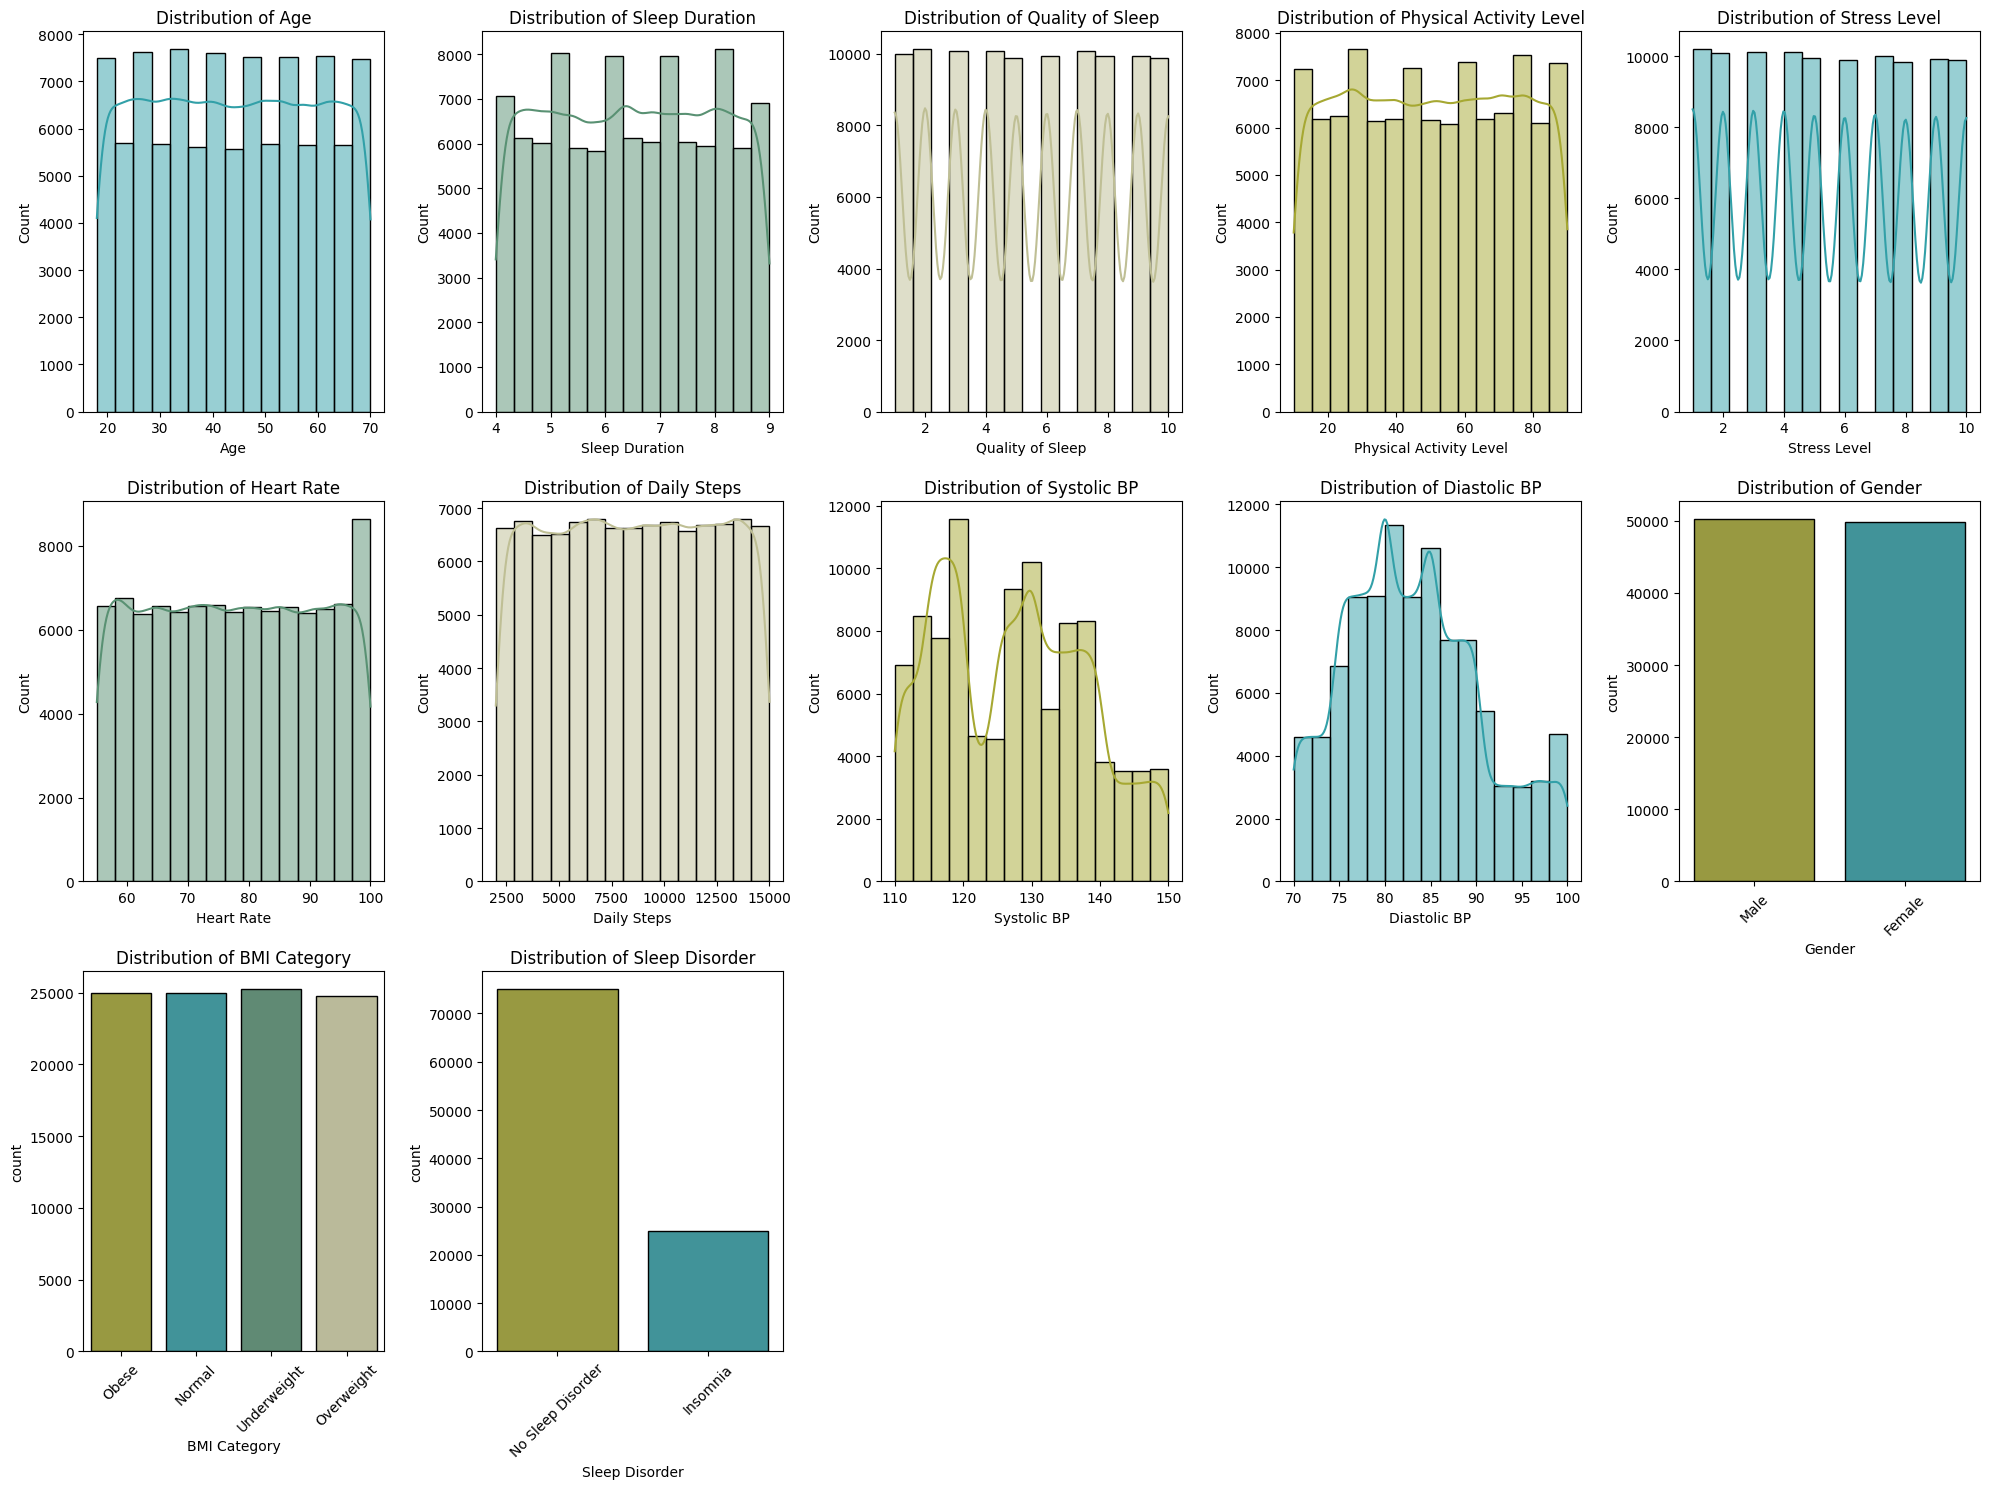

In [105]:

# Define numerical and categorical variables
numerical_vars = [
    'Age', 'Sleep Duration', 'Quality of Sleep',
    'Physical Activity Level', 'Stress Level', 'Heart Rate',
    'Daily Steps', 'Systolic BP', 'Diastolic BP'
]
categorical_vars = ['Gender', 'BMI Category', 'Sleep Disorder']

# Set up figure size
plt.figure(figsize=(20, 15))

# Custom color palette
custom_palette = ['#a6a832', '#32a0a8', '#599173', '#bfbf95']

# Loop through numerical variables
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(3, 5, i)  # Adjust grid based on the number of variables
    sns.histplot(sleep_df[var], kde=True, bins=15, color=custom_palette[i % len(custom_palette)], edgecolor='black')
    plt.title(f'Distribution of {var}')

# Loop through categorical variables
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 5, len(numerical_vars) + i)  # Continue subplot indexing
    sns.countplot(x=var, data=sleep_df, palette=custom_palette[0:len(sleep_df[var].unique())], hue=var, edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)  # Rotate labels for better visibility if needed

plt.tight_layout()
plt.show()


**BoxPlot**

A different way to visualize the similar information for the numeric values is using Boxplots.
Boxplots are useful, since they directly show:
- the maximum
- the minimum
- the average
- the range of the central 50 % of the data
- some potential outliers.

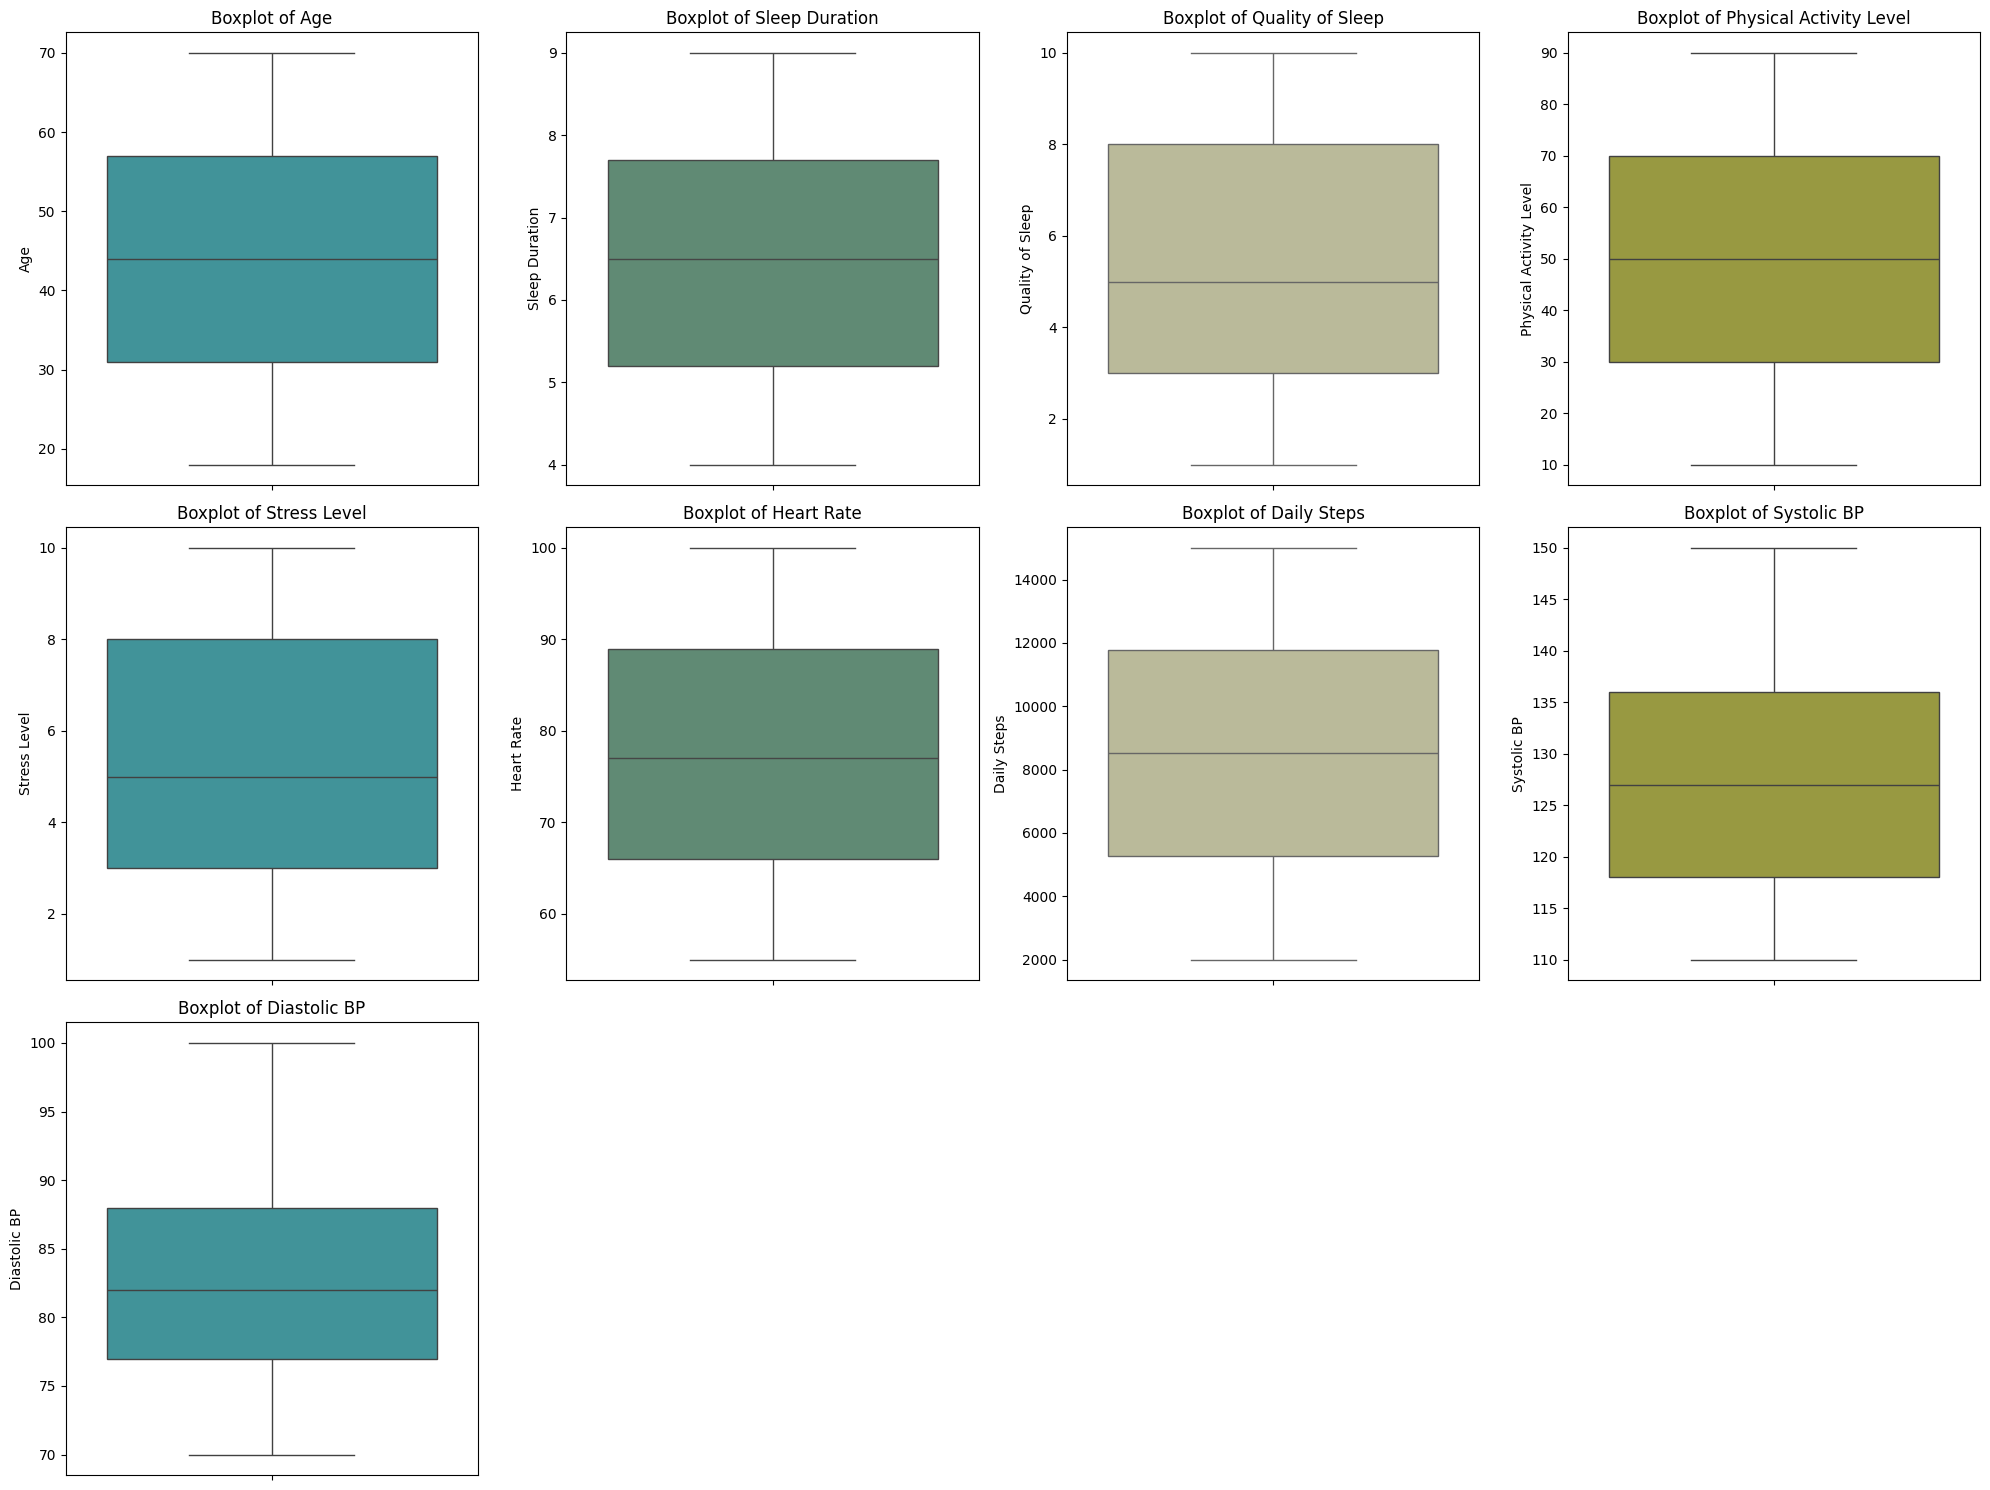

In [106]:
plt.figure(figsize=(20, 15))
colors = ['#a6a832', '#32a0a8', '#599173', '#bfbf95']
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=sleep_df[var], color=colors[i % len(colors)])  # Cycle colors
    plt.title(f'Boxplot of {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Data Analysis

Our objective is to understand how the attributes contribute to the stress level of the individuals.

## Prediction of the Sleep Disorder

Now we would like to do a more precise prediction of sleep disorder.
For this we would like to apply the machine learning models to predict sleep disorder based on the following attributes:
- Age
-Person ID
- Sleep Duration
- Quality of Sleep
- Physical Activity Level
- Stress Level
- Heart Rate
- Daily Steps
- Systolic BP
- Diastolic BP
- 'Gender
- BMI Category
- Sleep Disorder


In [107]:
#Binary Encoding (0/1)¶
sleep_df['Gender'] = sleep_df['Gender'].map({'Male': 0, 'Female': 1})


In [108]:
#Ordinal Encoding (Logical Order)¶

# BMI Category Encoding (Underweight < Normal < Overweight < Obese)
bmi_mapping = {'Obese': 3, 'Normal': 1, 'Underweight': 0, 'Overweight': 2}
sleep_df['BMI Category'] = sleep_df['BMI Category'].map(bmi_mapping)


In [109]:
#Label Encoding for "Sleep Disorder"¶

sleep_disorder_mapping = {'No Sleep Disorder': 0, 'Insomnia': 1}
sleep_df['Sleep Disorder'] = sleep_df['Sleep Disorder'].map(sleep_disorder_mapping)

In [110]:
# Split the dataset
X = sleep_df.drop(['Sleep Disorder'], axis=1)
y = sleep_df['Sleep Disorder']


## F. Machine Learning - Multi-Classification Prediction

In [111]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the splits for verification
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (70000, 11)
Testing Features Shape: (30000, 11)
Training Target Shape: (70000,)
Testing Target Shape: (30000,)


In [112]:
# Apply Scaler to standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [115]:
# Make predictions
y_predict = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_predict))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict))


Accuracy: 0.6126
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74     22401
           1       0.25      0.27      0.26      7599

    accuracy                           0.61     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.62      0.61      0.62     30000

Confusion Matrix:
 [[16295  6106]
 [ 5515  2084]]


In [116]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train,y_train)

GradientBoostingClassifier()

In [117]:
# Make predictions
gb_predict = gradient_boosting.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, gb_predict)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, gb_predict))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_predict))

Accuracy: 0.7466
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.85     22401
           1       0.00      0.00      0.00      7599

    accuracy                           0.75     30000
   macro avg       0.37      0.50      0.43     30000
weighted avg       0.56      0.75      0.64     30000

Confusion Matrix:
 [[22399     2]
 [ 7599     0]]


In [120]:
# Instantiating the object and fitting
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the values
predicted = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predicted)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, predicted))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted))


Accuracy: 0.7467
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.85     22401
           1       0.00      0.00      0.00      7599

    accuracy                           0.75     30000
   macro avg       0.37      0.50      0.43     30000
weighted avg       0.56      0.75      0.64     30000

Confusion Matrix:
 [[22401     0]
 [ 7599     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [121]:
random_forest = RandomForestClassifier(n_estimators=100) #100 trees
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [122]:
# Make predictions
y_predict_rf = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predict_rf)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_predict_rf))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict_rf))


Accuracy: 0.7463
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.85     22401
           1       0.26      0.00      0.00      7599

    accuracy                           0.75     30000
   macro avg       0.50      0.50      0.43     30000
weighted avg       0.62      0.75      0.64     30000

Confusion Matrix:
 [[22384    17]
 [ 7593     6]]


In [123]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=1, n_estimators=100)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [124]:
# Make predictions
y_predict = xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_predict))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict))


Accuracy: 0.7411
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.85     22401
           1       0.24      0.01      0.02      7599

    accuracy                           0.74     30000
   macro avg       0.49      0.50      0.43     30000
weighted avg       0.62      0.74      0.64     30000

Confusion Matrix:
 [[22158   243]
 [ 7524    75]]


In [125]:
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree','Gradient Boosting','XGBoost']
accuracy_scores = [75, 75, 62, 75,75] #change with your code

data = {'Model': model_names, 'Accuracy Score': accuracy_scores}

df = pd.DataFrame(data)

colors = px.colors.qualitative.Pastel

fig = px.bar(df, x='Model', y='Accuracy Score', text='Accuracy Score',
             title='Comparison of Model Accuracy', color='Model',
             color_discrete_map={model: color for model, color in zip(model_names, colors)})

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(width=700, height=600)

fig.show()

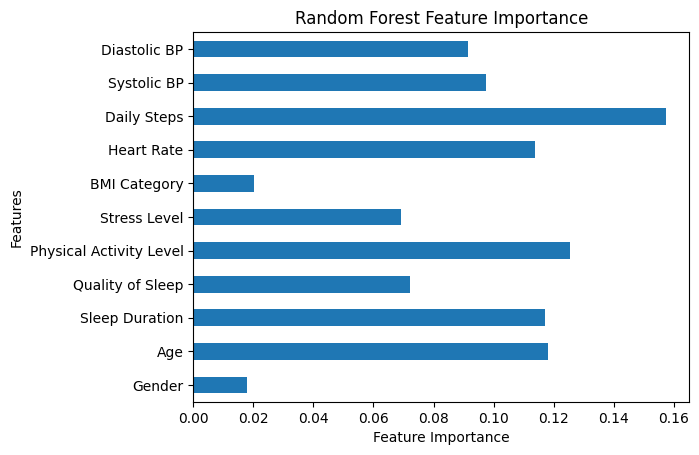

In [127]:
# Get feature names after preprocessing
feature_names = scaler.get_feature_names_out()

# Create a series for feature importance and plot
(pd.Series(random_forest.feature_importances_, index=feature_names).plot(kind='barh'))
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

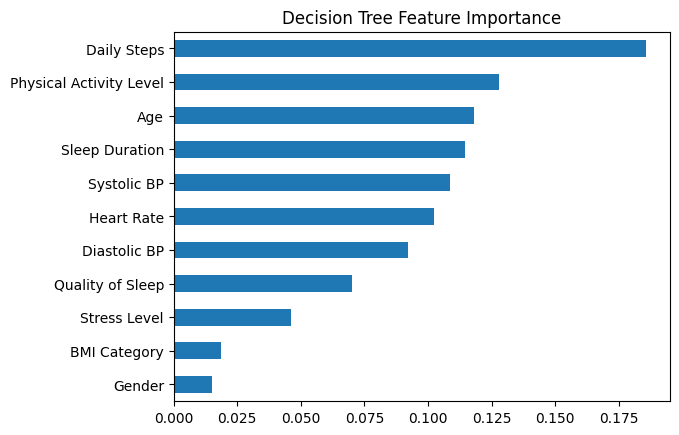

In [128]:
# Decision Tree Feature Importance
dt_importance = pd.Series(decision_tree.feature_importances_, index=feature_names)
dt_importance.sort_values().plot(kind="barh", title="Decision Tree Feature Importance")
plt.show()

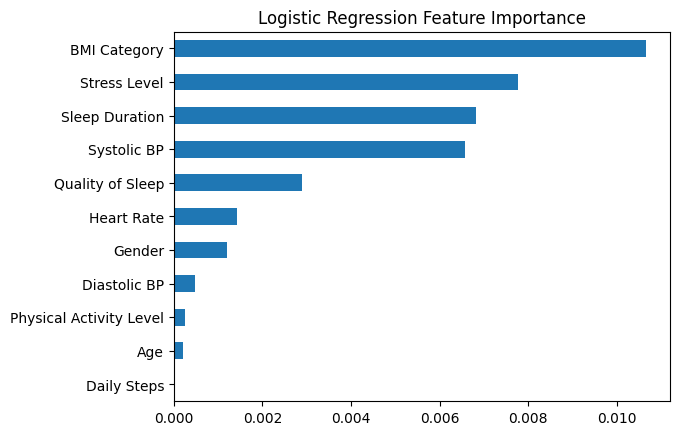

In [130]:
# Get absolute values of coefficients
lr_importance = np.abs(model.coef_).flatten()

# Plot Logistic Regression Feature Importance
pd.Series(lr_importance, index=feature_names).sort_values().plot(kind="barh", title="Logistic Regression Feature Importance")
plt.show()
